* [1. Impotar DataFrame de datos](#section1)
* [1.1 Impotar DataFrame de datos (compra_alquiar.csv)](#section11)
* [1.2 Informacion del DataFrame](#section12)
* [1.3 Dimension del DataFrame](#section13)
* [1.4 Verificacion de valores nulos](#section14)
* [2. Graficas  Histograma de las  variables](#section2)
* [2.1 Grafica de desviacion - Un mejor panorama lo multiplicamos por 'logaritmo'](#section21)
* [2.1.1 Grafica de desviacion - Alta variabilidad](#section211)
* [2.1.2 Grafica de desviacion - Baja variabilidad](#section212)
* [3. Reporte](#section3)
* [4. Grafica de Dispersion](#section4)
* [5. Escalamiento--> Estandarizacion](#section5)

<a id="section1"></a>
## <font color="#004D7F">1. Importar librerias</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<a id="section11"></a>
## <font color="#004D7F">1.1 Impotar DataFrame de datos (compra_alquiar.csv)</font>

In [2]:
df=pd.read_csv('Datos/comprar_alquilar.csv')

### Primeros datos del DataFrame

In [3]:
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


### Informacion del DataFrame

Ingresos y gastos son mensuales de 1 personas o 2 si están casados.

Trabajo: 0-sin trabajo 1-autonomo 2-asalariado 3-empresario 4-Autonomos 5-Asalariados 6-Autonomo y Asalariado 7-Empresario y Autonomo 8 Empresarios o empresario y autónomo

Estado_civil: 0-soltero 1-casado 2-divorciado

Hijos: Cantidad de hijos menores (no trabajan)

Comprar: 0-mejor alquilar 1-Comprar casa

<a id="section12"></a>
## <font color="#004D7F">1.2 Informacion del DataFrame</font>
 

In [4]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


<a id="section13"></a>
## <font color="#004D7F">1.3 Dimension del DataFrame</font>


In [6]:
df.shape

(202, 10)

<a id="section14"></a>
## <font color="#004D7F">1.4 Verificacion de valores nulos</font>


In [7]:
df.isnull().sum()

ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
comprar           0
dtype: int64

<a id="section2"></a>
## <font color="#004D7F">2. Graficas  Histograma de las  variables</font>

C:\Users\Luis\AppData\Local\Temp/ipykernel_8232/2166563055.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop([],1).hist()  #(bins=9)


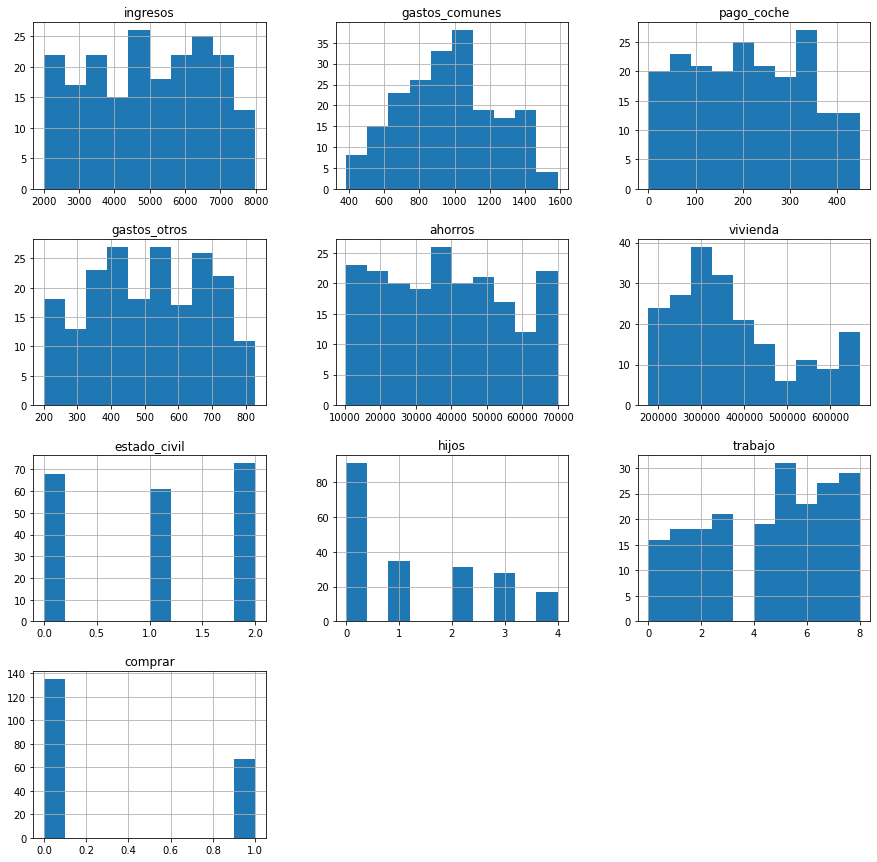

In [8]:
plt.rcParams['figure.figsize']=[15,15]
df.drop([],1).hist()  #(bins=9)
plt.show()

<a id="section21"></a>
## <font color="#004D7F">2.1 Grafica de desviacion - Un mejor panorama lo multiplicamos por 'logaritmo'</font>

<AxesSubplot:title={'center':'variables con sd'}>

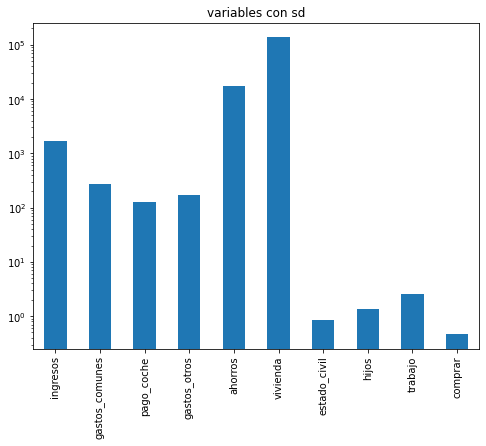

In [9]:
df.std().plot(kind='bar',figsize=(8,6),logy=True,title='variables con sd')

In [10]:
df.columns

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')

<a id="section211"></a>
## <font color="#004D7F">2.1.1 Grafica de desviacion - Alta variabilidad</font>

### Vivienda

In [11]:
df.vivienda.describe()

count       202.000000
mean     373349.638614
std      136371.525622
min      176553.000000
25%      274810.000000
50%      340783.500000
75%      444482.000000
max      669540.000000
Name: vivienda, dtype: float64

<AxesSubplot:>

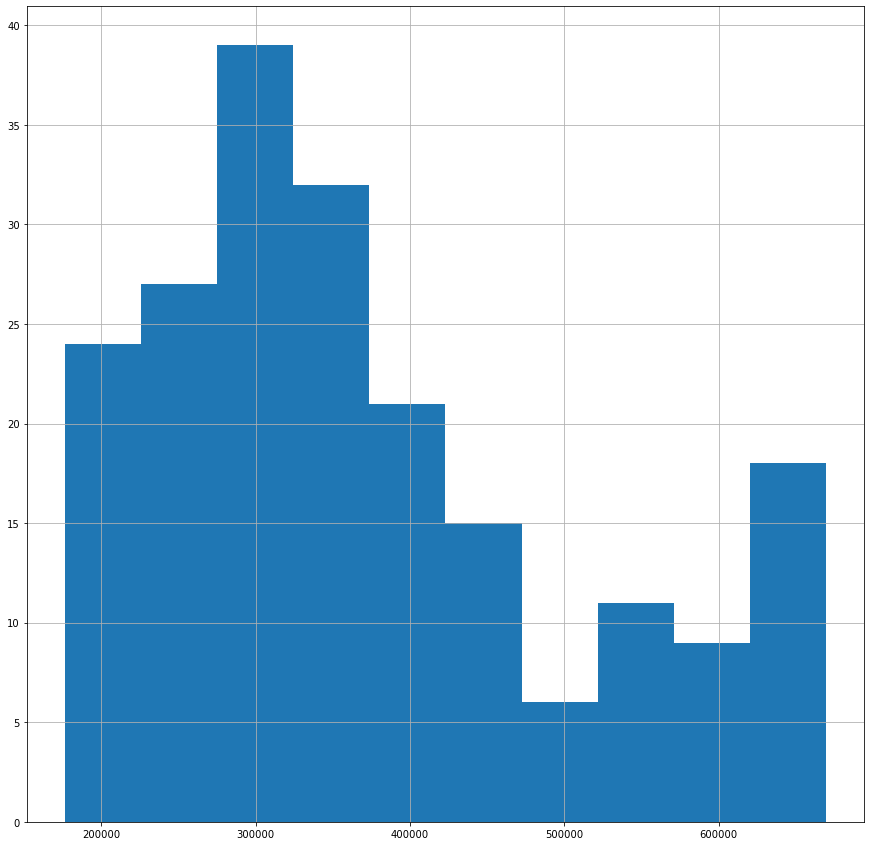

In [12]:
df.vivienda.hist()

<a id="section212"></a>
## <font color="#004D7F">2.1.2 Grafica de desviacion - Baja variabilidad</font>

### Estado Civil

In [13]:
df.estado_civil.describe()

count    202.000000
mean       1.024752
std        0.837184
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: estado_civil, dtype: float64

<AxesSubplot:>

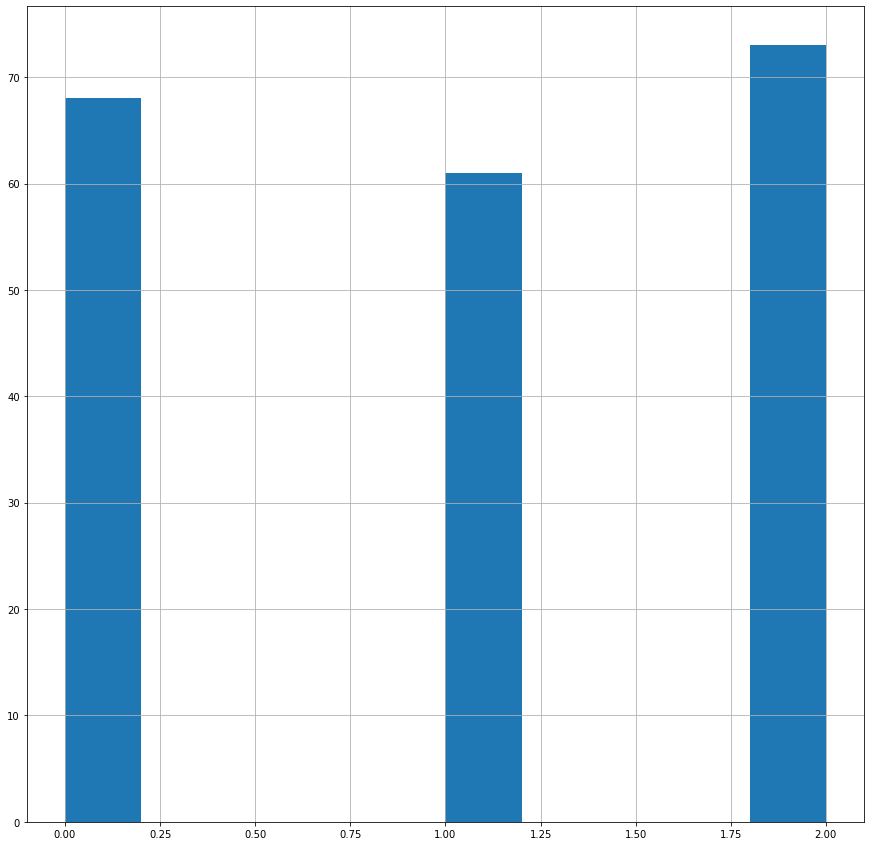

In [14]:
df.estado_civil.hist()

In [15]:
### # son valores unicos
df.estado_civil.unique()

array([0, 1, 2], dtype=int64)

<a id="section3"></a>
## <font color="#004D7F">3. Reporte</font>

In [16]:
from pandas_profiling import ProfileReport

In [17]:
reporte= ProfileReport(df,title='Reporte de Variables',explorative=True)


In [18]:
reporte.to_file("repaso_5 5.PCA df.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<a id="section4"></a>
## <font color="#004D7F">4. Grafica de Dispersion</font>

In [19]:
df.columns

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')

### Ingresos vs ahorros --> vivienda

Text(0, 0.5, 'ahorros')

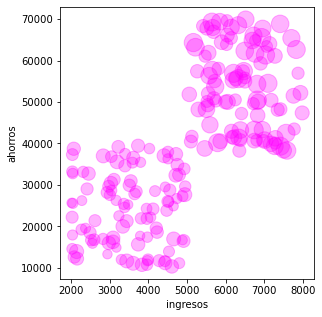

In [20]:
plt.rcParams["figure.figsize"]=(10,5)
plt.subplot(1,2,1)
plt.scatter(df["ingresos"],df["ahorros"],s=df["vivienda"]*0.0005,color="magenta",label="check",alpha=0.3)
plt.xlabel("ingresos")
plt.ylabel("ahorros")

### gastos comunes vs gastos otros --> vivienda

Text(0, 0.5, 'gastos_otros')

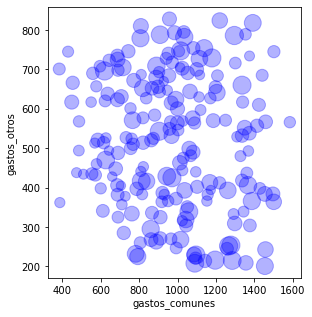

In [21]:
plt.rcParams["figure.figsize"]=(10,5)
plt.subplot(1,2,1)
plt.scatter(df["gastos_comunes"],df["gastos_otros"],s=df["vivienda"]*0.0005,color="blue",label="check",alpha=0.3)
plt.xlabel("gastos_comunes")
plt.ylabel("gastos_otros")

<a id="section5"></a>
## <font color="#004D7F">5. Escalamiento--> Estandarizacion</font>

In [22]:
from sklearn.preprocessing import StandardScaler

### 1.Estandarizar

In [26]:
scaler=StandardScaler()

### 2.Creando un DataFrame

In [24]:
df1=df.drop(['comprar'],axis=1)

### 3.Ajustar

In [27]:
scaler.fit(df1)

StandardScaler()

In [28]:
x_scaled=scaler.transform(df1)

In [29]:
x_scaled

array([[ 0.62012866,  0.10468863, -1.69895439, ..., -1.22708822,
         0.5623736 , -0.98441983],
       [ 1.0639266 , -0.10162457, -0.71204191, ..., -0.02963981,
         1.29527339,  0.59691461],
       [ 0.89117304,  0.22626604, -0.91263388, ...,  1.1678086 ,
        -0.17052619,  1.38758182],
       ...,
       [-1.05736798, -0.06109876,  0.51558094, ..., -0.02963981,
         1.29527339,  1.38758182],
       [-0.96801269, -0.38530521,  1.26178306, ..., -0.02963981,
         0.5623736 ,  0.201581  ],
       [-0.57842363,  0.68310241, -0.85646812, ..., -1.22708822,
        -0.90342598, -0.19375261]])

### 4.Aplicar PCA al objeto 'x_scaled'

In [31]:
pca=PCA(n_components=9)
pca.fit(x_scaled)
x_pca=pca.transform(x_scaled)

In [32]:
expl=pca.explained_variance_ratio_
print(expl)

[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]


### 5.Variancia Acumulativa

In [35]:
print("variancia acumulada",sum(expl[0:5]))

variancia acumulada 0.8524062117714313


### 6. Grafica de la Variancia Acumulada

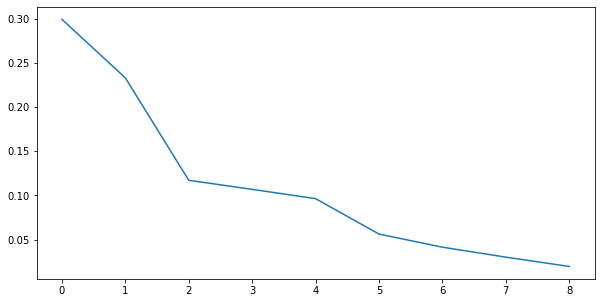

In [36]:
plt.plot(expl)

<BarContainer object of 9 artists>

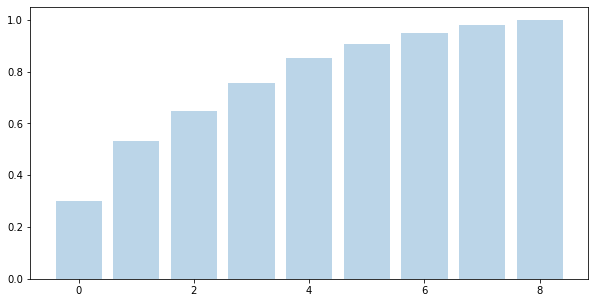

In [39]:
plt.bar(range(0,9),np.cumsum(expl),alpha=.3)

C:\Users\Luis\AppData\Local\Temp/ipykernel_8232/1331226312.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


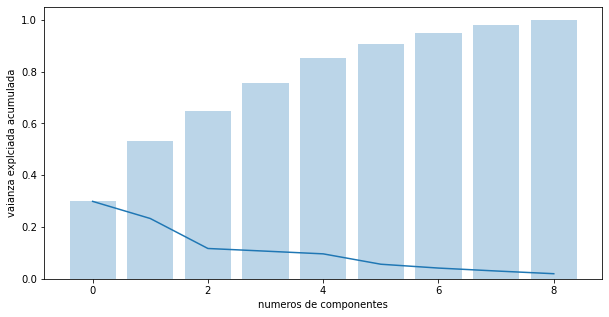

In [40]:
plt.plot((expl))
plt.bar(range(0,9),np.cumsum(expl),alpha=.3)
plt.xlabel("numeros de componentes")
plt.ylabel("vaianza explciada acumulada")
plt.show()